# **Execução do Case de Previsão de vendas**

A proposta para esse case foi retirada da plataforma Kaggle (mock_kaggle.csv):

https://www.kaggle.com/datasets/tevecsystems/retail-sales-forecasting/data

Acrecida uma proposta de previsão de 14 dias (mock_kaggle_pred.csv)

### **Estrutura de pastas**

Sales_forecast_regression_models/  
├── regression_models.ipynb  
├── mock_kaggle.csv  
├── mock_kaggle_pred.csv   
└── README.md  

### **Contexto**

Este conjunto de dados contém muitos dados históricos de vendas. Foi extraído de um grande varejista brasileiro e possui muitos SKUs e muitas lojas. Os dados foram transformados para proteger a identidade do varejista.

### **Inspiração**

Todo negócio de varejo no mundo enfrenta uma questão fundamental: quanto estoque devo manter? Por um lado, misturar estoques significa custos de capital de giro, custos operacionais e uma operação complexa. Por outro lado, a falta de estoque leva à perda de vendas, clientes insatisfeitos e uma marca danificada.

Os modelos atuais de gestão de estoques possuem muitas soluções para fazer o pedido correto, mas todas se baseiam em um único fator desconhecido: a demanda para os próximos períodos. É por isso que as previsões de curto prazo são tão importantes no varejo e na indústria de bens de consumo.

Incentivamos você a buscar o melhor modelo de previsão de demanda para as próximas 2 a 3 semanas. Esta informação valiosa pode ajudar muitos profissionais da cadeia de abastecimento a gerir corretamente os seus níveis de inventário.

### **Proposta de trabalho**

Realizaremos uma análise dos dados buscando o entendimento das informações coletadas, após chegar a um entendimento aceitável, realizaremos uma validação de 5 tipos de modelos de machine learning para checarmos suas performance para os nossos dados.

Os modelos serão:

* regressão linear;
* regressão não linear;
* arvore de decisão;
* floresta aleatoria;
* redes neurais Multi Layer Perceptron.

Aquele que obtiver a melhor performance utilizaremos para realizar a previsão e demostração do resultado.

### **Ferrametas utilizadas**

Através da linguagem de programação Python usaremos as seguintes bibliotécas

*  Pandas;
*  seaborn;
*  matplotlib;
*  sklearn.


# **ETL**

* Extração dos dados da pasta local do google colab

In [ ]:
###     1º Passo 'extract'     ###

# Carregar bibliotecas: vendas

import pandas as pd

df = pd.read_csv('./mock_kaggle.csv', delimiter=',',decimal='.')

In [ ]:
# Visualização dos dados iniciais da base de dados recém carregada

df.head()

,data,venda,estoque,preco
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29


* Transformação extração de novas features a partir da coluna data

In [ ]:
###     2º Passo 'transform'     ###

# Convertendo a coluna data para o formato 'date'

df['data'] = pd.to_datetime(df['data'])

# criando a coluna dia da semana, semana, mes e ano

df['diasemana'] = df['data'].dt.strftime('%a') # texto

df['semana'] = df['data'].dt.strftime('%W')

df['mes'] = df['data'].dt.strftime('%m')

df['ano'] = df['data'].dt.strftime('%Y')

df['anomes'] = df['data'].dt.strftime('%Y/%m')

# Criando a coluna de receita

df['receita'] = df['venda'] * df['preco']

# Criando a coluna real - previsão

df['categoria'] = 'real'

# Agrupando as features recém criadas realizando a média para esse processo

df = df.groupby(['ano','mes', 'semana','diasemana','data','categoria'], as_index=False).agg({'estoque':'sum','preco':'mean', 'receita':'sum','venda':'sum'})

# Criando uma ordenação no data Frame

df = df.sort_values(by=['data','ano', 'mes', 'semana', 'diasemana','categoria'])

# Documentação da bibliotéca datetime https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

* Carregando o dataframe

In [ ]:
# Carregando o dataframe para análise

df.head(10)

,ano,mes,semana,diasemana,data,categoria,estoque,preco,receita,venda
4,2014,01,00,Wed,2014-01-01,real,4972,1.29,0.00,0
3,2014,01,00,Thu,2014-01-02,real,4902,1.29,90.30,70
0,2014,01,00,Fri,2014-01-03,real,4843,1.29,76.11,59
1,2014,01,00,Sat,2014-01-04,real,4750,1.29,119.97,93
2,2014,01,00,Sun,2014-01-05,real,4654,1.29,123.84,96
6,2014,01,01,Mon,2014-01-06,real,4509,1.29,187.05,145
10,2014,01,01,Tue,2014-01-07,real,4329,1.29,230.91,179
11,2014,01,01,Wed,2014-01-08,real,4104,1.29,414.09,321
9,2014,01,01,Thu,2014-01-09,real,4459,1.09,136.25,125
5,2014,01,01,Fri,2014-01-10,real,5043,1.09,95.92,88


In [ ]:
df.tail()

,ano,mes,semana,diasemana,data,categoria,estoque,preco,receita,venda
936,2016,07,30,Wed,2016-07-27,real,3179,2.39,234.22,98
934,2016,07,30,Thu,2016-07-28,real,3071,2.39,258.12,108
930,2016,07,30,Fri,2016-07-29,real,4095,2.39,305.92,128
932,2016,07,30,Sat,2016-07-30,real,3825,2.39,645.30,270
933,2016,07,30,Sun,2016-07-31,real,3642,2.39,437.37,183


In [ ]:
df

,ano,mes,semana,diasemana,data,categoria,estoque,preco,receita,venda
4,2014,01,00,Wed,2014-01-01,real,4972,1.29,0.00,0
3,2014,01,00,Thu,2014-01-02,real,4902,1.29,90.30,70
0,2014,01,00,Fri,2014-01-03,real,4843,1.29,76.11,59
1,2014,01,00,Sat,2014-01-04,real,4750,1.29,119.97,93
2,2014,01,00,Sun,2014-01-05,real,4654,1.29,123.84,96
...,...,...,...,...,...,...,...,...,...,...
936,2016,07,30,Wed,2016-07-27,real,3179,2.39,234.22,98
934,2016,07,30,Thu,2016-07-28,real,3071,2.39,258.12,108
930,2016,07,30,Fri,2016-07-29,real,4095,2.39,305.92,128
932,2016,07,30,Sat,2016-07-30,real,3825,2.39,645.30,270


# **Análise exploratória dos dados EDA**

Avaliando o conteúdo do data frame

In [ ]:
df.describe()

,estoque,preco,receita,venda
count,937.000000,937.000000,937.000000,937.000000
mean,1608.258271,1.592572,148.226083,90.533618
std,1356.691877,0.529502,144.298915,80.682089
min,0.000000,0.000000,0.000000,0.000000
25%,794.000000,1.290000,52.320000,33.000000
50%,1348.000000,1.390000,112.230000,76.000000
75%,1964.000000,1.890000,207.100000,127.000000
max,7228.000000,2.980000,870.240000,542.000000


Avaliando a correlação entre as váriaveis venda, estoque e preço

In [ ]:
df.corr()

<ipython-input-36-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,estoque,preco,receita,venda
estoque,1.000000,-0.032604,0.151113,0.153659
preco,-0.032604,1.000000,0.399306,0.094779
receita,0.151113,0.399306,1.000000,0.912127
venda,0.153659,0.094779,0.912127,1.000000


Entendendo os tipos dos dados e se existem dados nulos na base de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 4 to 933
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ano        937 non-null    object        
 1   mes        937 non-null    object        
 2   semana     937 non-null    object        
 3   diasemana  937 non-null    object        
 4   data       937 non-null    datetime64[ns]
 5   categoria  937 non-null    object        
 6   estoque    937 non-null    int64         
 7   preco      937 non-null    float64       
 8   receita    937 non-null    float64       
 9   venda      937 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 112.8+ KB


Análise gráfica das variáveis:`

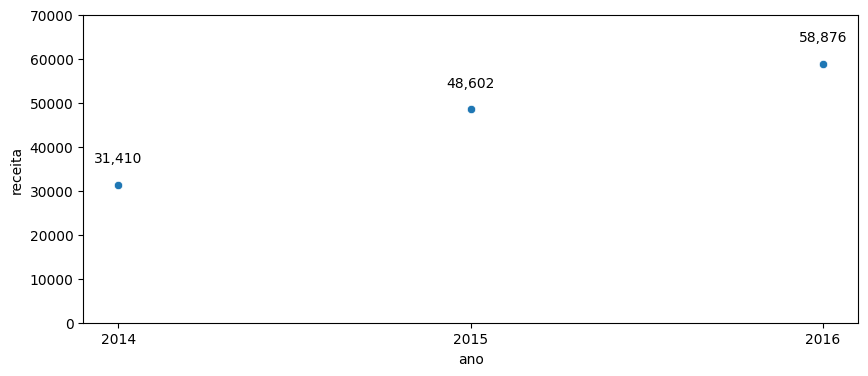

In [ ]:
# Importação da biblioteca de visualização
import seaborn as sns
import matplotlib.pyplot as plt

df_ano = df.groupby('ano')['receita'].sum().reset_index()

plt.figure(figsize=(10, 4))
eixo = sns.scatterplot(x=df_ano.ano, y=df_ano.receita)

for index, row in df_ano.iterrows():
    formatted_receita = "{:,.0f}".format(row.receita)  # Formatando o número com separador de milhares
    eixo.text(row.name, row.receita + 5000, formatted_receita, color='black', ha="center")

eixo.set_xlabel('ano')
eixo.set_ylabel('receita')

eixo.set_ylim(0, 70000)

plt.show()

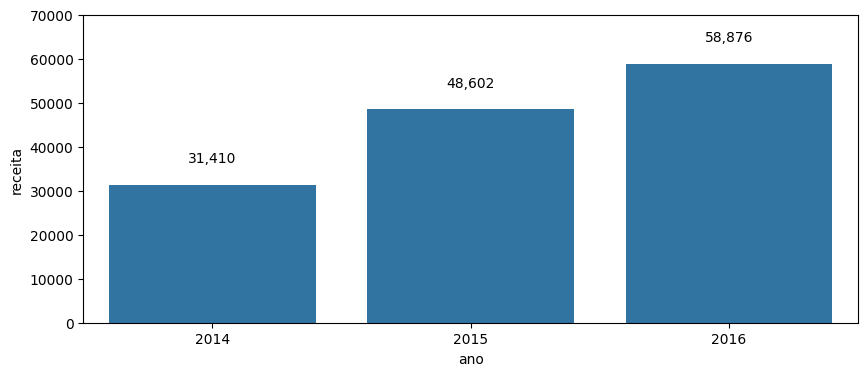

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_ano = df.groupby('ano')['receita'].sum().reset_index()

plt.figure(figsize=(10, 4))
eixo = sns.barplot(x='ano', y='receita', data=df_ano)
for index, row in df_ano.iterrows():
    formatted_receita = "{:,.0f}".format(row.receita)  # Formatando o número com separador de milhares
    eixo.text(row.name, row.receita + 5000, formatted_receita, color='black', ha="center")

eixo.set_xlabel('ano')
eixo.set_ylabel('receita')

eixo.set_ylim(0, 70000)

plt.show()

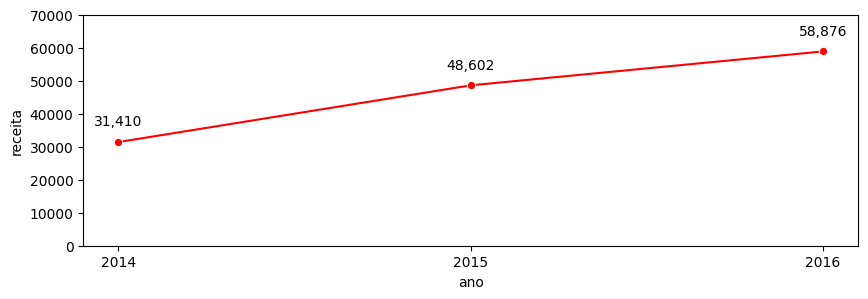

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_ano = df.groupby('ano')['receita'].sum().reset_index()

plt.figure(figsize=(10, 3))
eixo = sns.lineplot(x='ano', y='receita', data=df_ano, marker='o', color='r')
for index, row in df_ano.iterrows():
    formatted_receita = "{:,.0f}".format(row.receita)  # Formatando o número com separador de milhares
    eixo.text(row.name, row.receita + 5000, formatted_receita, color='black', ha="center")  # Ajustando a posição y da label

eixo.set_xlabel('ano')
eixo.set_ylabel('receita')

eixo.set_ylim(0, 70000)

plt.show()

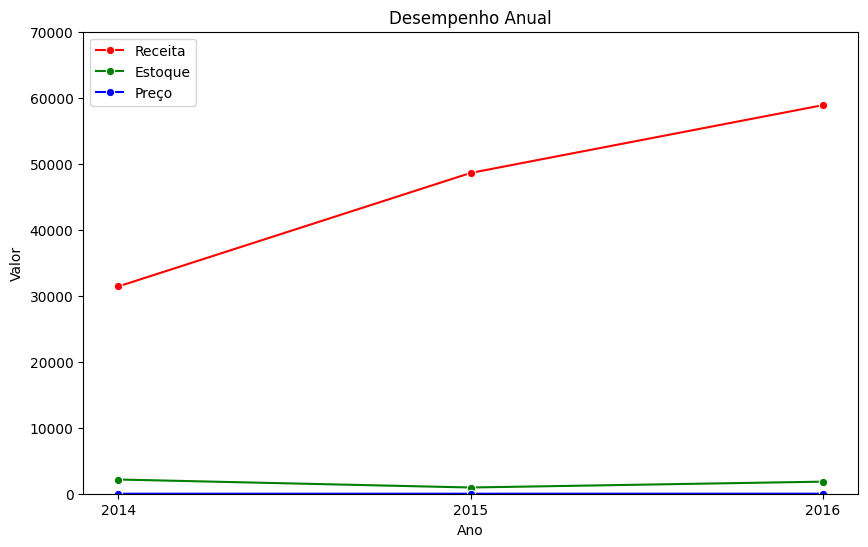

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_agrupado = df.groupby('ano').agg({'receita': 'sum', 'estoque': 'mean', 'preco': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
eixo = sns.lineplot(x='ano', y='receita', data=df_agrupado, marker='o', color='r', label='Receita')
sns.lineplot(x='ano', y='estoque', data=df_agrupado, marker='o', color='g', ax=eixo, label='Estoque')
sns.lineplot(x='ano', y='preco', data=df_agrupado, marker='o', color='b', ax=eixo, label='Preço')

eixo.set_xlabel('Ano')
eixo.set_ylabel('Valor')
eixo.set_title('Desempenho Anual')

eixo.set_ylim(0, 70000)

plt.legend()

plt.show()


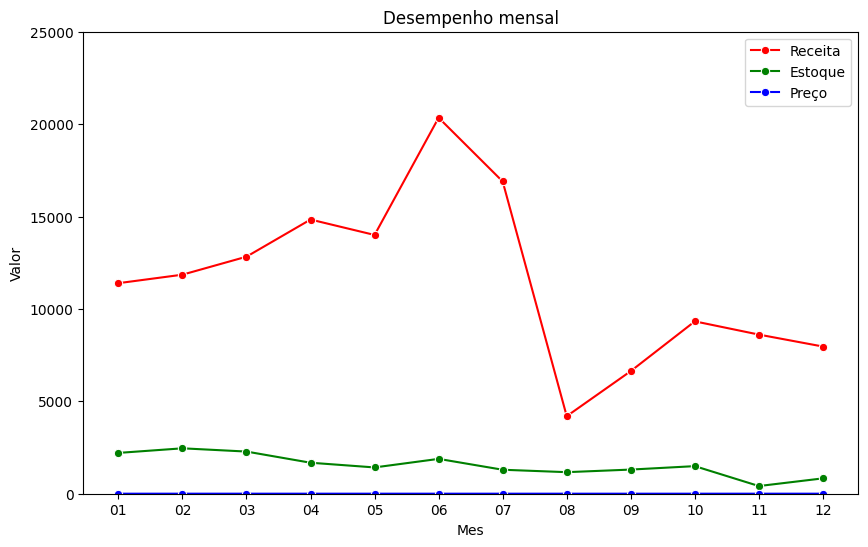

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_2016 = df[df['ano'] == '2016']

df_2016 = df.groupby('mes').agg({'receita': 'sum', 'estoque': 'mean', 'preco': 'mean'}).reset_index()

plt.figure(figsize=(10, 6))
eixo = sns.lineplot(x='mes', y='receita', data=df_2016, marker='o', color='r', label='Receita')
sns.lineplot(x='mes', y='estoque', data=df_2016, marker='o', color='g', ax=eixo, label='Estoque')
sns.lineplot(x='mes', y='preco', data=df_2016, marker='o', color='b', ax=eixo, label='Preço')

eixo.set_xlabel('Mes')
eixo.set_ylabel('Valor')
eixo.set_title('Desempenho mensal')

eixo.set_ylim(0, 25000)

plt.legend()

plt.show()

# **Treinando os modelos preditivos para avaliação**

Nesta etapa será utilizado 5 modelos regressivos para avalição dos dados e entender qual deles possuem melhor performace:

Separando o Conjunto de Dados em Teste e Treino:

In [ ]:
from sklearn.model_selection import train_test_split

# Deletando as colunas data do dataframe

df_models = df.drop(columns=['data', 'diasemana','categoria'],axis=1)

x=df_models.drop(['venda'],axis=1)
y=df_models['venda']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

print("Tamanho do Conjunto de Treino: ",x_train.shape,"| Tamanho do Conjunto de Teste",x_test.shape)
print("Amostra da Tabela de Treino")

Tamanho do Conjunto de Treino:  (702, 6) | Tamanho do Conjunto de Teste (235, 6)
Amostra da Tabela de Treino


Implementando os modelos:

* regressão linear;
* regressão não linear;
* arvore de decisão;
* floresta aleatoria;
* redes neurais Multi Layer Perceptron.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

def treinar_e_avaliar_modelos(x_train, y_train, x_test, y_test, modelos):
    modelos_treinados = {}  # Dicionário para armazenar os modelos treinados

    for nome, modelo in modelos.items():
        modelo.fit(x_train, y_train)
        score_treino = modelo.score(x_train, y_train)
        y_pred = modelo.predict(x_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Armazenando o modelo treinado
        modelos_treinados[nome] = {
            'modelo': modelo,
            'score_treino': score_treino,
            'mse': mse,
            'r2': r2
        }

        print(f'{nome}:')
        print(f'Score de Treino: {score_treino}')
        print(f'MSE: {mse}, R2: {r2}')
        print('')

    return modelos_treinados

# Criando os modelos
modelos = {
    'Regressão Linear': LinearRegression(),
    'Regressão Polinomial': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Árvore de Decisão': DecisionTreeRegressor(random_state=1212, max_depth=5),
    'Random Forest': RandomForestRegressor(random_state=1212, max_depth=20),
    'MLP': MLPRegressor(max_iter=1000, hidden_layer_sizes=(10000,))
}

# Chamar a função para treinar e avaliar os modelos
modelos_treinados = treinar_e_avaliar_modelos(x_train, y_train, x_test, y_test, modelos)


Regressão Linear:
Score de Treino: 0.9276081541551153
MSE: 630.956832874373, R2: 0.9094678166757004

Regressão Polinomial:
Score de Treino: 0.9957401600354762
MSE: 28.69540246436373, R2: 0.9958826700954587

Árvore de Decisão:
Score de Treino: 0.9756325071947917
MSE: 305.54545116025344, R2: 0.9561591295044213

Random Forest:
Score de Treino: 0.9980233658184993
MSE: 62.10178808510636, R2: 0.9910893896844334

MLP:
Score de Treino: 0.9029987339470754
MSE: 683.397364409413, R2: 0.9019434416833162



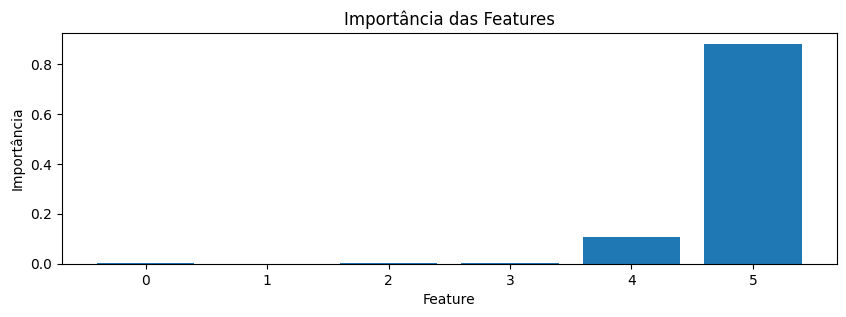

Feature: 0, Score: 0.00156
Feature: 1, Score: 0.00081
Feature: 2, Score: 0.00171
Feature: 3, Score: 0.00461
Feature: 4, Score: 0.10873
Feature: 5, Score: 0.88258


In [ ]:
from matplotlib import pyplot as plt

nome_modelo = 'Random Forest'

modelo = modelos_treinados[nome_modelo]['modelo']

importance = modelo.feature_importances_

plt.figure(figsize=(10, 3))

# Plotando o gráfico de barras
plt.bar(range(len(importance)), importance)

plt.xlabel('Feature')
plt.ylabel('Importância')
plt.title('Importância das Features')

plt.show()

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

In [ ]:
df_models.columns

Index(['ano', 'mes', 'semana', 'estoque', 'preco', 'receita', 'venda'], dtype='object')

# **Enviando dados reais para os modelos pré treinados**

Carregando os dados de duas semanas para os modelos pré treinados

In [ ]:
df_pred = pd.read_csv('./mock_kaggle_pred.csv', delimiter=',',decimal='.')

# Convertendo a coluna data para o formato 'date'

df_pred['data'] = pd.to_datetime(df_pred['data'])

# criando a coluna dia da semana, semana, mes e ano

df_pred['diasemana'] = df_pred['data'].dt.strftime('%a') # texto

df_pred['semana'] = df_pred['data'].dt.strftime('%W')

df_pred['mes'] = df_pred['data'].dt.strftime('%m')

df_pred['ano'] = df_pred['data'].dt.strftime('%Y')

df_pred['anomes'] = df_pred['data'].dt.strftime('%Y/%m')

# Criando a coluna de receita

df_pred['receita'] = df_pred['venda'] * df_pred['preco']

# Criando a coluna real - previsão

df_pred['categoria'] = 'previsto'

# Agrupando as features recém criadas realizando a média para esse processo

df_pred = df_pred.groupby(['ano','mes', 'semana','diasemana','data','categoria'], as_index=False).agg({'estoque':'sum','preco':'mean', 'receita':'sum','venda':'sum'})

# Criando uma ordenação no data Frame

df_pred = df_pred.sort_values(by=['data','ano', 'mes', 'semana', 'diasemana','categoria'])

# Documentação da bibliotéca datetime https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes


Criando um novo dataframe para apenas com as colunas que serão utilizadas para a previsão.

In [ ]:
df_pred_test = pd.DataFrame(df_pred,columns=['ano', 'mes', 'semana', 'estoque', 'preco','receita'])

Aqui executamos a função que realiza as previsões de vendas, aqui passamos o nome do modelo que gostariamos de executar:

*  Regressão Linear
*  Regressão Polinomial
*  Árvore de Decisão
*  Random Forest
*  MLP

In [ ]:
# Função para executar um modelo pré-treinado
def executar_modelo(nome_modelo, dados):
    modelo = modelos_treinados[nome_modelo]['modelo']
    return modelo.predict(dados)

# Aqui passamos o nome do modelo que queremos executar
nome_modelo = 'Regressão Polinomial'
valor_predito = executar_modelo(nome_modelo, df_pred_test)
print(f'O valor predito pelo modelo {nome_modelo} é:', valor_predito)

O valor predito pelo modelo Regressão Polinomial é: [163.36290032 289.09929818  61.3242183   97.6717325  131.56648046
 128.51984875  63.13579884  97.79703245  99.25380806 109.04062809
 131.60288302 270.83131435 185.01658675 166.42374097]


Unimos os dois data base o real e o previstos para consumo externo

In [ ]:
# Unindo os Data Frames df + df_pred

df_pred['venda'] = valor_predito

df_dados_vendas = pd.concat([df, df_pred])

df_dados_vendas.to_csv('dados_vendas.csv')

Aqui plotamos o gráfico com a previsão e com a previsão para análise

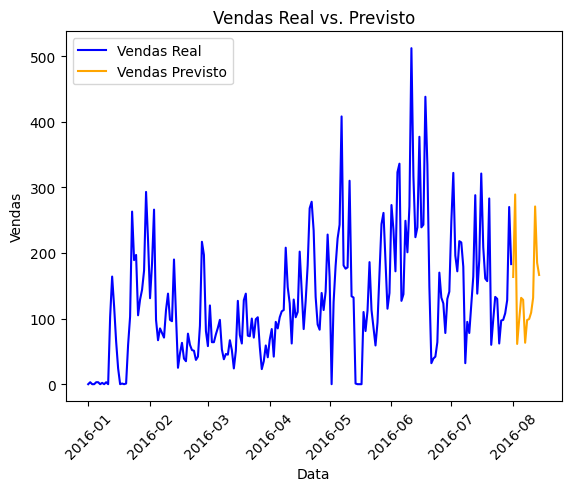

In [ ]:
import matplotlib.pyplot as plt

# Supondo que 'df' seja o DataFrame que contém os dados
# Filtrando os dados reais e previstos

df_dados_vendas_graf = df_dados_vendas[df_dados_vendas['ano'] == '2016']

df_real = df_dados_vendas_graf[df_dados_vendas_graf['categoria'] == 'real']
df_previsto = df_dados_vendas_graf[df_dados_vendas_graf['categoria'] == 'previsto']

# Plotando as vendas reais
plt.plot(df_real['data'], df_real['venda'], label='Vendas Real', color='blue')

# Plotando as vendas previstas
plt.plot(df_previsto['data'], df_previsto['venda'], label='Vendas Previsto', color='orange')

# Adicionando rótulos e título ao gráfico
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Vendas Real vs. Previsto')

# Adicionando uma legenda
plt.legend()

# Rotacionando os rótulos do eixo x para melhor visualização
plt.xticks(rotation=45)

# Mostrando o gráfico
plt.show()